In [126]:
# helper functions

def intersection(lst1, lst2):
    return list(set(lst1) & set(lst2))


In [127]:
import csv

authors = []

path = './samples/authors.csv'
f = open(path, 'r')
reader = csv.reader(f, skipinitialspace=True)
for row in reader:
    authors.append( {
        "author": row[0],
        "composition": row[1],
        "file": row[2],
    })

def find_author(file, arr):
    a = next(filter(lambda a: a['file'] == file, arr), None)
    return a

def find_author_by_name(name, arr):
    a = next(filter(lambda a: a['author'] == name, arr), None)
    return a

def get_author_name(a):
    return f"{a['author']} ({a['composition']})"

In [128]:
import os
import glob
path = './samples'
print('Files to read:')
files=[]
for filename in glob.glob(os.path.join(path, '*.txt')):
   with open(os.path.join(os.getcwd(), filename), 'r') as f:
       name = os.path.basename(f.name)
       a = find_author(name, authors)
       if a is None: continue
       print(name)
       files.append(f)

Files to read:
shevchenko_gaydamaki.txt
shevchenko_katerina.txt


In [129]:
total_letters = {}

for _f in files:
    f = open(_f.name,'r')
    name = os.path.basename(f.name)
    total_letters[name]= len(f.read())
# print(total_letters)

In [130]:
import re

total_unigrams = {}
total_unigrams_per_author = {}
total_bigrams = {}
total_bigrams_per_author = {}

def is_bad_ngram(ngram):
    pattern = r"[А-ЯҐЄІЇ]+"
    return not re.match(pattern,ngram, re.IGNORECASE)
    # return not ngram.isalpha()
    # black_list = ["\n","\r"," " ,".",",","(",")","\\","/",'"',"!","...","?",";"]
    # return len(intersection(black_list, ngram))!=0

def count_ngrams(file, text, n):
    ngrams = []
    for i in range(len(text)-n+1):
        letters = text[i:i+n].lower()
        ngram = next(filter(lambda x: x['name']==letters, ngrams), None)
        created = ngram is None
        if created:
            is_bad = False
            for l in letters:
                is_bad = is_bad or is_bad_ngram(l)
                if is_bad: break
            if is_bad: continue
            ngram = {"name": letters, "count": 0}
        ngram['count']+=1
        if created:
            ngrams.append(ngram)
    ngrams.sort(key=lambda x:x.get('count'), reverse=True)
    if n==1:
        total_unigrams[file] = ngrams

        a = find_author(file,authors)
        unigram_arr = total_unigrams_per_author.get(a['author'],[])
        unigram_arr+=ngrams
        total_unigrams_per_author[a['author']]=unigram_arr
    elif n==2:
        total_bigrams[file]=ngrams

        a = find_author(file,authors)
        bigram_arr = total_bigrams_per_author.get(a['author'],[])
        bigram_arr+=ngrams
        total_bigrams_per_author[a['author']]=bigram_arr


for _f in files:
    f = open(_f.name,'r')
    name = os.path.basename(f.name)
    text = f.read()
    count_ngrams(name, text, 1)
    count_ngrams(name, text,2)
    print(f'done {name}')

print(len(total_bigrams))
print(total_bigrams_per_author)

done shevchenko_gaydamaki.txt
done shevchenko_katerina.txt
2
{'Тарас Шевченко': [{'name': 'ть', 'count': 77}, {'name': 'не', 'count': 66}, {'name': 'та', 'count': 65}, {'name': 'ва', 'count': 64}, {'name': 'ро', 'count': 61}, {'name': 'на', 'count': 60}, {'name': 'ли', 'count': 56}, {'name': 'по', 'count': 50}, {'name': 'ра', 'count': 45}, {'name': 'ин', 'count': 38}, {'name': 'іт', 'count': 37}, {'name': 'мо', 'count': 37}, {'name': 'ко', 'count': 36}, {'name': 'ст', 'count': 35}, {'name': 'ві', 'count': 34}, {'name': 'ог', 'count': 34}, {'name': 'ат', 'count': 34}, {'name': 'ти', 'count': 33}, {'name': 'за', 'count': 32}, {'name': 'ам', 'count': 31}, {'name': 'оз', 'count': 31}, {'name': 'ла', 'count': 31}, {'name': 'да', 'count': 30}, {'name': 'ки', 'count': 30}, {'name': 'од', 'count': 30}, {'name': 'ав', 'count': 30}, {'name': 'ов', 'count': 30}, {'name': 'ло', 'count': 29}, {'name': 'то', 'count': 29}, {'name': 'ен', 'count': 28}, {'name': 'ми', 'count': 28}, {'name': 'ні', 'coun

In [131]:
all_symbols_set = set()

for file in total_unigrams:
    for ngram in total_unigrams[file]:
        all_symbols_set.add(ngram['name'])

all_symbols_set=sorted(all_symbols_set)

In [132]:

import pandas as pd
from IPython.display import HTML, display

authors_with_total_letters =  authors.copy()
for file in total_letters:
    a= find_author(file,authors)
    if a is None:
        continue
    a["total_letters"] = total_letters[file]

def view_total_letters(arr):
    new_arr = list(map(lambda a: {'name': get_author_name(a), 'total_letters': a['total_letters'] },arr))
    df = pd.DataFrame(new_arr)
    # new_df = df[['author','composition','total_letters']]
    df.columns=['Автор (твір)','Кількість символів']
    return HTML(df.to_html(classes='table table-striped', index=None))

view_total_letters(authors_with_total_letters)

Автор (твір),Кількість символів
Тарас Шевченко (Гайдамаки),13566
Тарас Шевченко (Катерина),36659


In [133]:

unigrams_freq={}
unigrams_freq_per_author={}
unigrams_freq_arr=[]
unigrams_freq_arr_per_author=[]
for a in authors:
    unigrams_freq[a['file']]=[]
    unigrams_freq_per_author[a['author']]=[]


for s in all_symbols_set:
    curr_symbol_set= {}

    for file in total_unigrams:
        l = next(filter(lambda x: x['name']==s, total_unigrams[file]), None)
        count = 0 if l is None else l['count']
        author = find_author(file,authors_with_total_letters)
        unigrams_freq[file].append({'frequency': round(count / author['total_letters'], 3),
                              'symbol': s})
        curr_symbol_set[file]=round(count / author['total_letters'], 3)
    unigrams_freq_arr.append(curr_symbol_set)

    curr_symbol_set_per_author= {}
    for author_name in total_unigrams_per_author:
        l = next(filter(lambda x: x['name']==s, total_unigrams_per_author[author_name]), None)
        count = 0 if l is None else l['count']
        author = find_author_by_name(author_name,authors_with_total_letters)
        unigrams_freq_per_author[author['author']].append({'frequency': round(count / author['total_letters'], 3),
                              'symbol': s})
        curr_symbol_set_per_author[author['author']]=round(count / author['total_letters'], 3)
    unigrams_freq_arr_per_author.append(curr_symbol_set_per_author)


for file in unigrams_freq:
    unigrams_freq[file]= sorted(unigrams_freq[file], key=lambda x: x['symbol'])

for author_name in unigrams_freq_per_author:
    unigrams_freq_per_author[author_name]= sorted(unigrams_freq_per_author[author_name], key=lambda x: x['symbol'])

In [134]:
ngrams_freq_df = pd.DataFrame(unigrams_freq_arr, index=all_symbols_set)
unigrams_columns=[]
for file in total_unigrams:
    a = find_author(file,authors_with_total_letters)
    unigrams_columns.append(get_author_name(a))

ngrams_freq_df.columns=unigrams_columns
HTML(ngrams_freq_df.to_html(classes='table table-striped'))

,Тарас Шевченко (Гайдамаки),Тарас Шевченко (Катерина)
а,0.035,0.032
б,0.007,0.008
в,0.017,0.014
г,0.006,0.005
д,0.013,0.012
е,0.018,0.018
ж,0.004,0.003
з,0.007,0.006
и,0.025,0.023
й,0.005,0.005


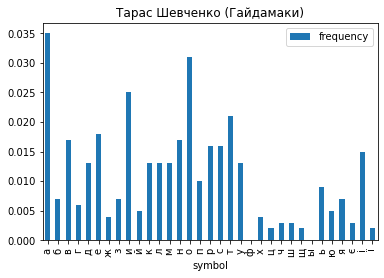

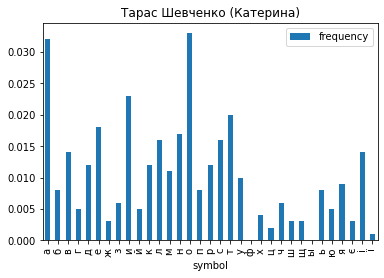

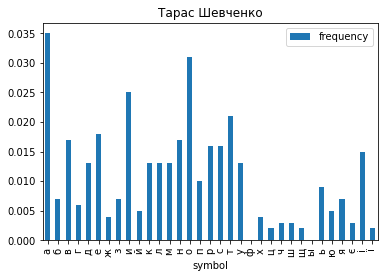

In [135]:

def freq_image_hist(freqs, title):
    hist_df = pd.DataFrame(freqs)
    hist_df.plot.bar(x='symbol',y='frequency', title=title)

for file in unigrams_freq:
    a = find_author(file, authors)
    freq_image_hist(unigrams_freq[file], get_author_name(a))

for author_name in unigrams_freq_per_author:
    a = find_author(file, authors)
    freq_image_hist(unigrams_freq_per_author[author_name], author_name)

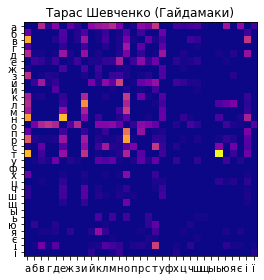

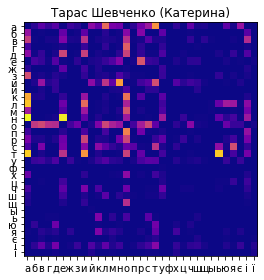

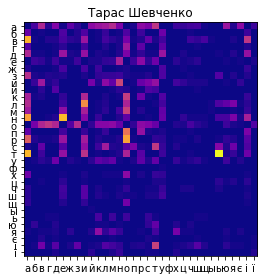

In [137]:
bigrams_freq={}
bigrams_freq_per_author={}

for file in total_bigrams:
    bigrams_freq[file]=[]
    i = 0
    for s in all_symbols_set:
        bigrams_freq[file].append([])
        for ss in all_symbols_set:
            bigram = s+ss
            l = next(filter(lambda x: x['name']==bigram, total_bigrams[file]), None)
            count = 0 if l is None else l['count']
            author = find_author(file,authors_with_total_letters)
            bigrams_freq[file][i].append(round(count / author['total_letters'], 10))
        i+=1

for author_name in total_bigrams_per_author:
    bigrams_freq_per_author[author_name]=[]
    i = 0
    for s in all_symbols_set:
        bigrams_freq_per_author[author_name].append([])
        for ss in all_symbols_set:
            bigram = s+ss
            l = next(filter(lambda x: x['name']==bigram, total_bigrams_per_author[author_name]), None)
            count = 0 if l is None else l['count']
            author = find_author_by_name(author_name,authors_with_total_letters)
            bigrams_freq_per_author[author_name][i].append(round(count / author['total_letters'], 10))
        i+=1

import matplotlib.pyplot as plt
import numpy as np

def view_bigram_heatmap(freqs, composition):
    fig, ax = plt.subplots()
    ax.imshow(freqs, cmap="plasma")

    ax.set_xticks(np.arange(len(all_symbols_set)))
    ax.set_yticks(np.arange(len(all_symbols_set)))
    ax.set_xticklabels(all_symbols_set)
    ax.set_yticklabels(all_symbols_set)


    ax.set_title(composition)
    fig.tight_layout()
    plt.show()

for file in bigrams_freq:
    a = find_author(file, authors)
    view_bigram_heatmap(bigrams_freq[file], get_author_name(a))

for author_name in bigrams_freq_per_author:
    a = find_author_by_name(author_name, authors)
    view_bigram_heatmap(bigrams_freq_per_author[author_name], author_name)